# LPPUFv1 Overall MLP Attack

In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sns

import pypuf.batch


In [2]:
results = pypuf.batch.FilesystemResultCollection('results/v1/mlp-full')

In [3]:
data = pd.DataFrame(results.load_all())

data['accuracy'] = data.apply(lambda row: row['accuracy'][0], axis=1)
data['memory_max'] = data.apply(lambda row: np.max(row['memory']), axis=1)

def Ncat(N):
    ext = {'G': 9, 'M': 6, 'k': 3}
    for label, mag in ext.items():
        if N > 10**mag:
            return f"{N//10**mag}{label}"
    return f"{N}"

data['Ncat'] = data.apply(lambda row: Ncat(row['N']), axis=1)

def netcat(net):
    return "-".join(str(int(math.log2(l))) for l in net)

data['netcat'] = data.apply(lambda row: netcat(row['net']), axis=1)

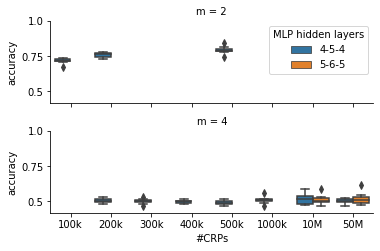

In [4]:
data['#CRPs'] = data['Ncat']
data['MLP hidden layers'] = data['netcat']

g = sns.catplot(
    x='#CRPs', 
    y='accuracy', 
    row='m', 
    hue='MLP hidden layers', 
    #hue='Correlation with', 
    data=data[data['m'] > 1],
    kind='box',
    aspect=3/1,
    height=1.7,
    order=list(map(Ncat, sorted(data['N'].unique()))),
    legend_out=False,
)
g.set(ylim=[.42,1], yticks=[.5, .75, 1.], yticklabels=[.5, .75, 1.])
g.fig.savefig('figures/lppufv1-mlp-attack.pdf')